<a href="https://colab.research.google.com/github/Pavankumar209/Basic-Algos/blob/master/Hand_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 !unzip level_1_test.zip
 

unzip:  cannot find or open level_1_test.zip, level_1_test.zip.zip or level_1_test.zip.ZIP.


In [0]:
 !unzip imgs.zip

unzip:  cannot find or open imgs.zip, imgs.zip.zip or imgs.zip.ZIP.


In [0]:
 !unzip level_1_test.rar
 

unzip:  cannot find or open level_1_test.rar, level_1_test.rar.zip or level_1_test.rar.ZIP.


In [0]:
 !unzip imgs.zip

unzip:  cannot find or open imgs.zip, imgs.zip.zip or imgs.zip.ZIP.


In [0]:
!ls dataset/testing_set/1

In [0]:
!mkdir img_data

In [0]:
ls

img_data/  imgs/  imgs.rar  sample_data/


In [0]:
!unzip imgs.zip -d imgs/

unzip:  cannot find or open imgs.zip, imgs.zip.zip or imgs.zip.ZIP.


In [1]:
!unzip dataset4.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset4/training_set/3/img459.jpg  
 extracting: dataset4/training_set/3/img46.jpg  
  inflating: dataset4/training_set/3/img460.jpg  
  inflating: dataset4/training_set/3/img462.jpg  
  inflating: dataset4/training_set/3/img463.jpg  
  inflating: dataset4/training_set/3/img464.jpg  
 extracting: dataset4/training_set/3/img465.jpg  
 extracting: dataset4/training_set/3/img466.jpg  
  inflating: dataset4/training_set/3/img467.jpg  
  inflating: dataset4/training_set/3/img468.jpg  
  inflating: dataset4/training_set/3/img469.jpg  
 extracting: dataset4/training_set/3/img47.jpg  
  inflating: dataset4/training_set/3/img471.jpg  
 extracting: dataset4/training_set/3/img472.jpg  
  inflating: dataset4/training_set/3/img473.jpg  
 extracting: dataset4/training_set/3/img474.jpg  
  inflating: dataset4/training_set/3/img475.jpg  
  inflating: dataset4/training_set/3/img476.jpg  
 extracting: dataset4/training_set/3/img477.jpg  
 

In [0]:
import os
import random
import imageio
import numpy as np

def get_class_names(path):
    names = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
    names.sort()
    return names

def load_image_dataset(path, set_names,
                       x_dtype='uint8', y_dtype='uint32'):
    if len(set_names) == 0:
        raise ValueError('At least one set name is required.')
    sets_class_names = [get_class_names(os.path.join(path, set_name)) for set_name in set_names]
    for i in range(1, len(sets_class_names)):
        if sets_class_names[i] != sets_class_names[0]:
            raise RuntimeError('Class names are not consistent.')
    class_names = sets_class_names[0]
    dataset = []
    instance_shape = None
    for set_name in set_names:
        x = []
        y = []
        for class_index, class_name in enumerate(class_names):
            class_path = os.path.join(path, set_name, class_name)
            instance_paths = [os.path.join(class_path, name) for name in os.listdir(class_path)]
            for instance_path in instance_paths:
                instance = imageio.imread(instance_path)
                if instance_shape is None:
                    instance_shape = instance.shape
                elif instance_shape != instance.shape:
                    raise RuntimeError('Instance shapes are not consistent.')
                x.append(instance)
                y.append(class_name)
        x = np.array(x, dtype=x_dtype)
        y = np.array(y, dtype=y_dtype)
        dataset.append((x, y))
    return tuple(dataset)

In [0]:
(training_images,training_labels), (test_images, test_labels) = load_image_dataset('dataset4', ['training_set', 'testing_set'])

In [5]:
training_images.shape
test_images.shape

(2268, 64, 64)

In [0]:
print(training_images[0][30])

[  0   0   0   0   0   0   0   0   0   1   0   0   0   2   4 144 254 253
 255 255 255 251 252 255 255 254 255 254 255 251 255 255 255 255 252 255
 255 255 255 255 255  86   0   0   3   1   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [9]:
training_labels[1000]

1

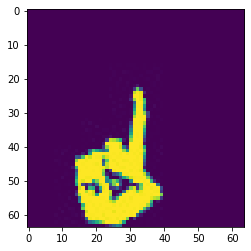

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(training_images[1000], interpolation='nearest')
plt.show()

In [10]:
import tensorflow as tf
training_images=training_images.reshape(9120, 64, 64, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(2268, 64, 64, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(12, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________

In [11]:
model